In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("1901_2018_monthly.npy")

In [3]:

X = data[:, 37*12:47*12]
X_test = data[:, 48*12:58*12]
X.shape, X_test.shape

((435, 120), (435, 120))

In [4]:
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)
    
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [5]:
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],21)

In [6]:
def DMD_predict(X,Phi,Lambda,b,t):
    x0 = X[:,-1]
    return np.real(Phi @ (Lambda**t) @ b + x0)

X_dmd = DMD_predict(X,Phi,Lambda,b,1)
X_dmd.shape

(435,)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(X_test[:,0], X_dmd)

33.488846875690875

In [9]:
#Forecast Dmd
X_dmd_forecast = np.zeros((X.shape[0],X_test.shape[1]))
for i in range(X_test.shape[1]):
    X_dmd_forecast[:,i] = DMD_predict(X,Phi,Lambda,b,i+1)
    

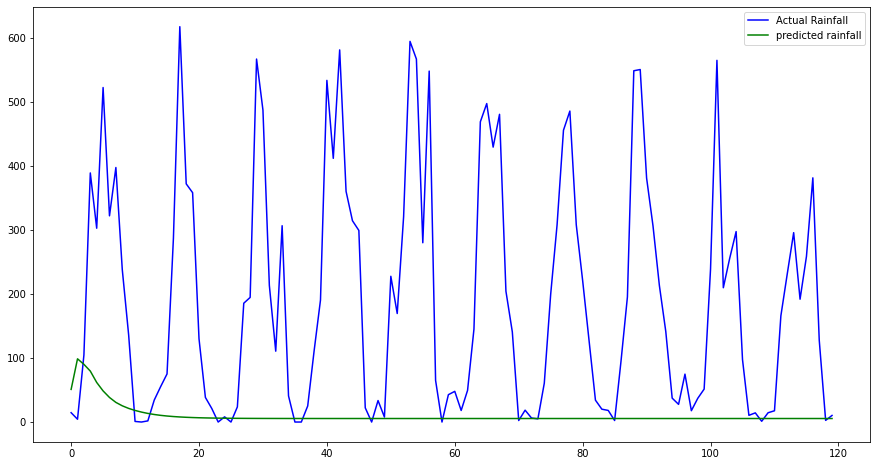

In [11]:
location = 120

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(X_test[location, :], color="blue", label = "Actual Rainfall" )
ax.plot(X_dmd_forecast[location,:], color="green", label="predicted rainfall")
plt.legend()
plt.show()